In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/seoul-bike-sharing/SeoulBikeData.csv',encoding='unicode escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
df.shape

(8760, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.Date = pd.to_datetime(df['Date'],dayfirst=True)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df['Day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.day_name()
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017


In [6]:
df = df.drop(['Date'],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017


EDA

<Axes: xlabel='Functioning Day', ylabel='Count'>

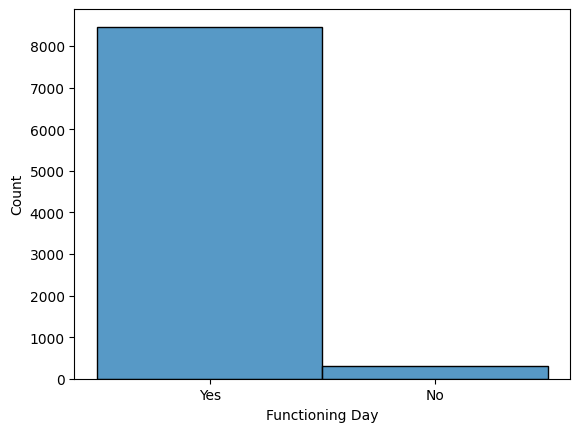

In [7]:
sns.histplot(df['Functioning Day'])

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

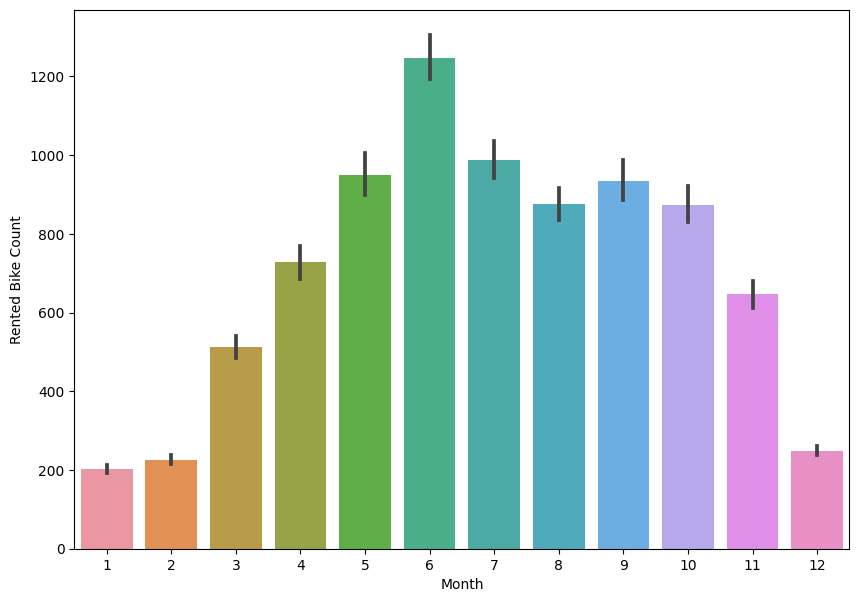

In [8]:
plt.figure(figsize=(10,7))
Month = df.groupby('Month').sum().reset_index()
sns.barplot(x=df.Month,y=df['Rented Bike Count'])


<Axes: xlabel='Month', ylabel='Rented Bike Count'>

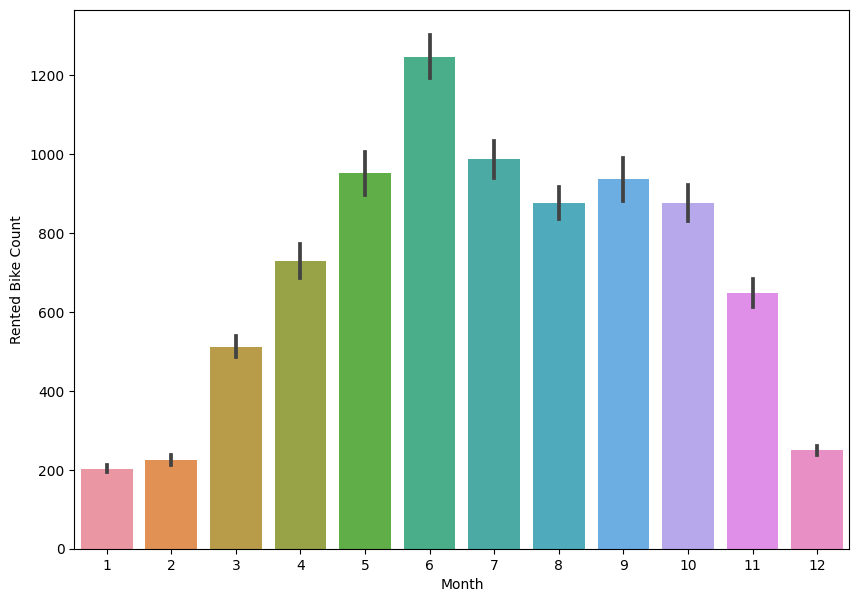

In [9]:
plt.figure(figsize=(10,7))
Month = df.groupby('Day').sum().reset_index()
sns.barplot(x=df.Month,y=df['Rented Bike Count'])

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

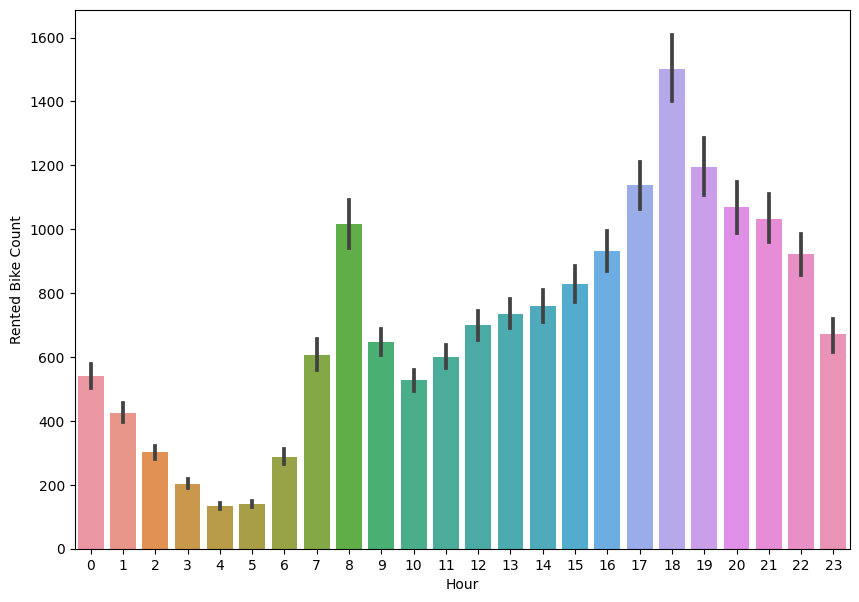

In [10]:
plt.figure(figsize=(10,7))
Hour = df.groupby('Hour').sum().reset_index()
sns.barplot(x=df.Hour,y=df['Rented Bike Count'])

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

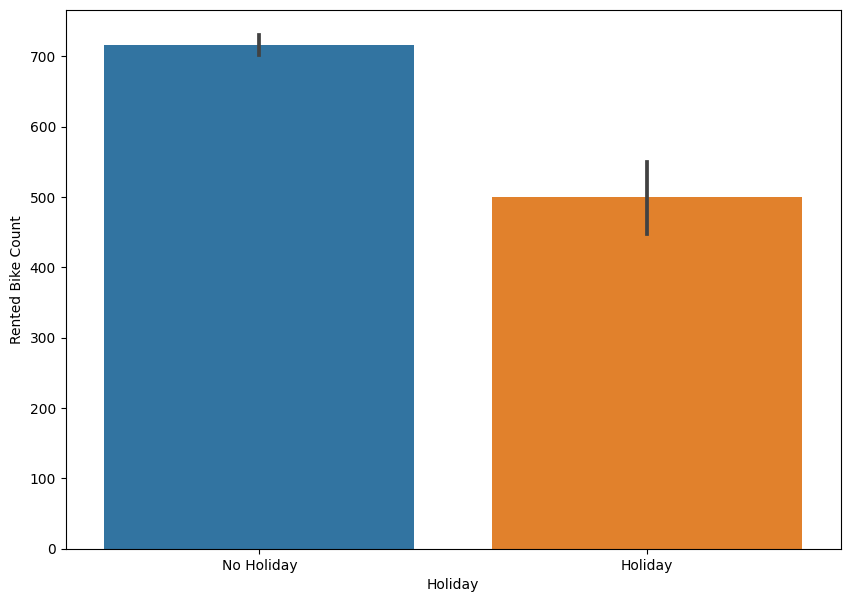

In [11]:
plt.figure(figsize=(10,7))

sns.barplot(x=df.Holiday,y=df['Rented Bike Count'])

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

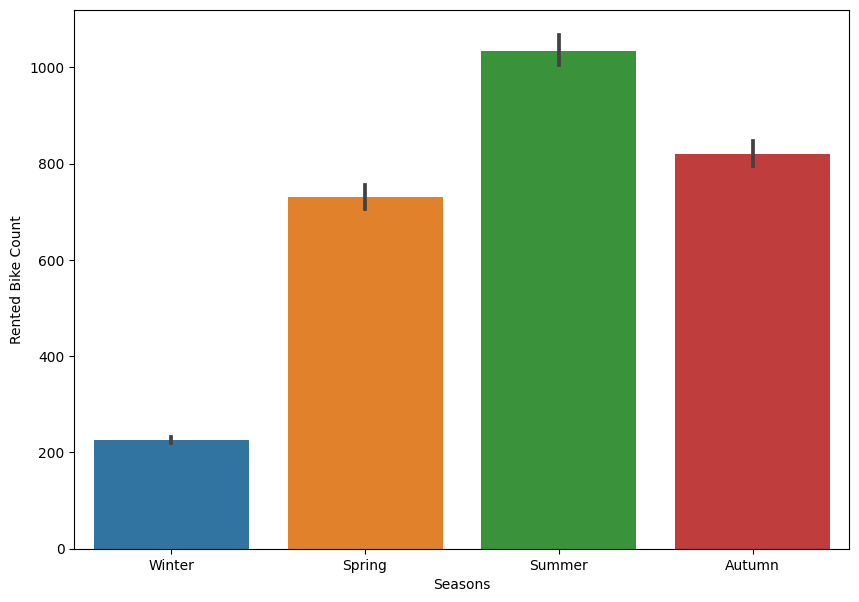

In [12]:
plt.figure(figsize=(10,7))

sns.barplot(x=df.Seasons,y=df['Rented Bike Count'])

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

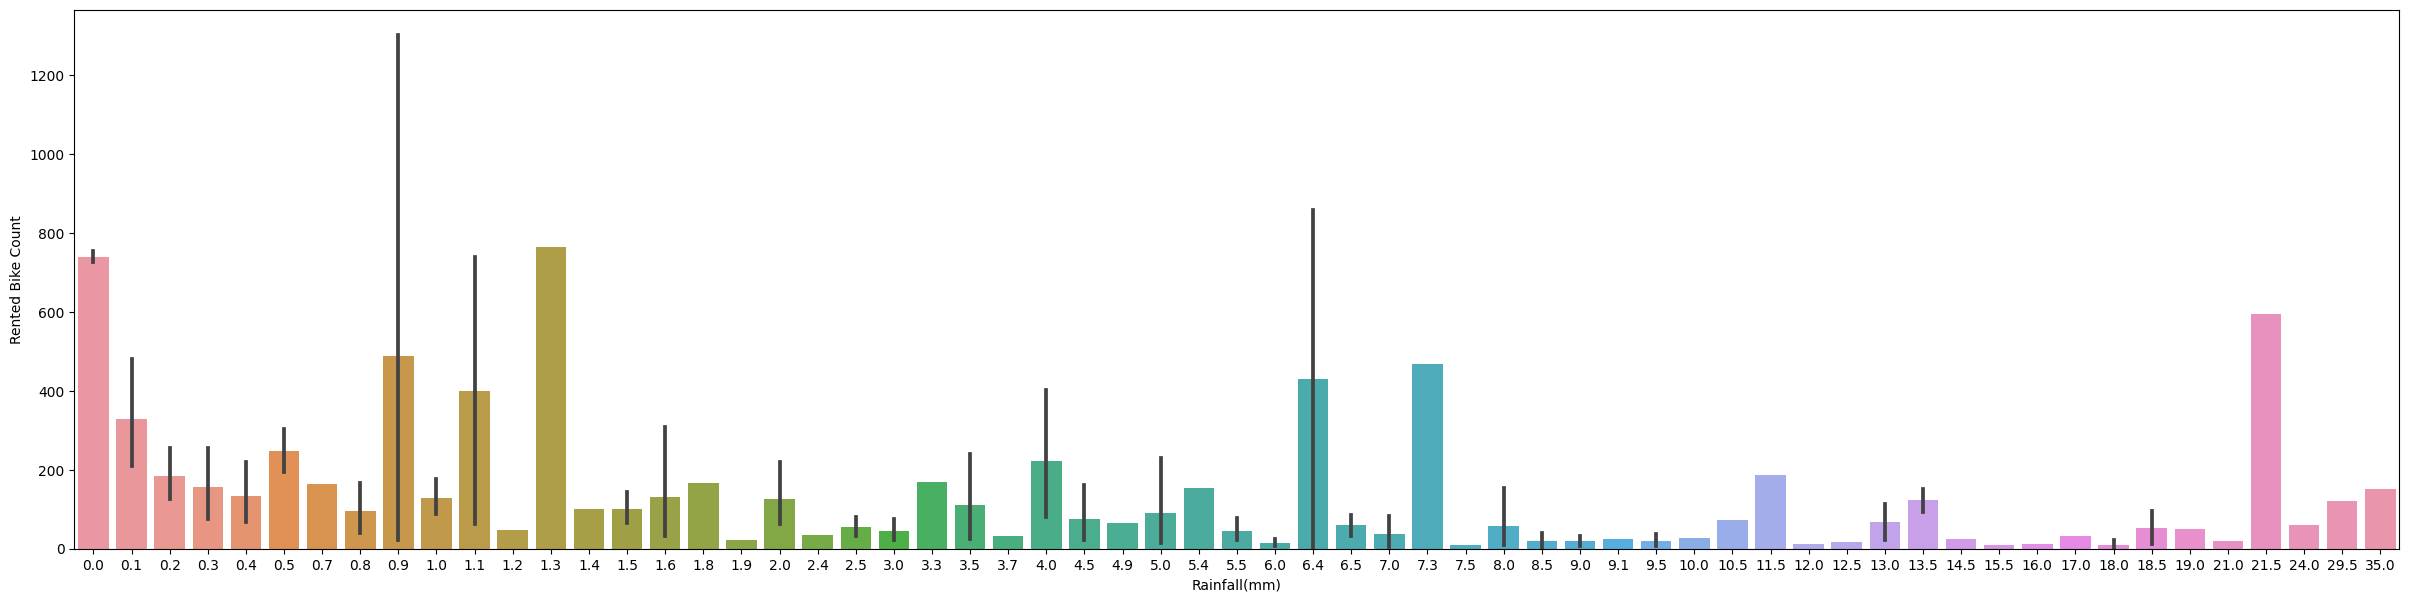

In [13]:
plt.figure(figsize=(30,7))
Month = df.groupby('Month').sum().reset_index()
sns.barplot(x=df['Rainfall(mm)'],y=df['Rented Bike Count'])

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

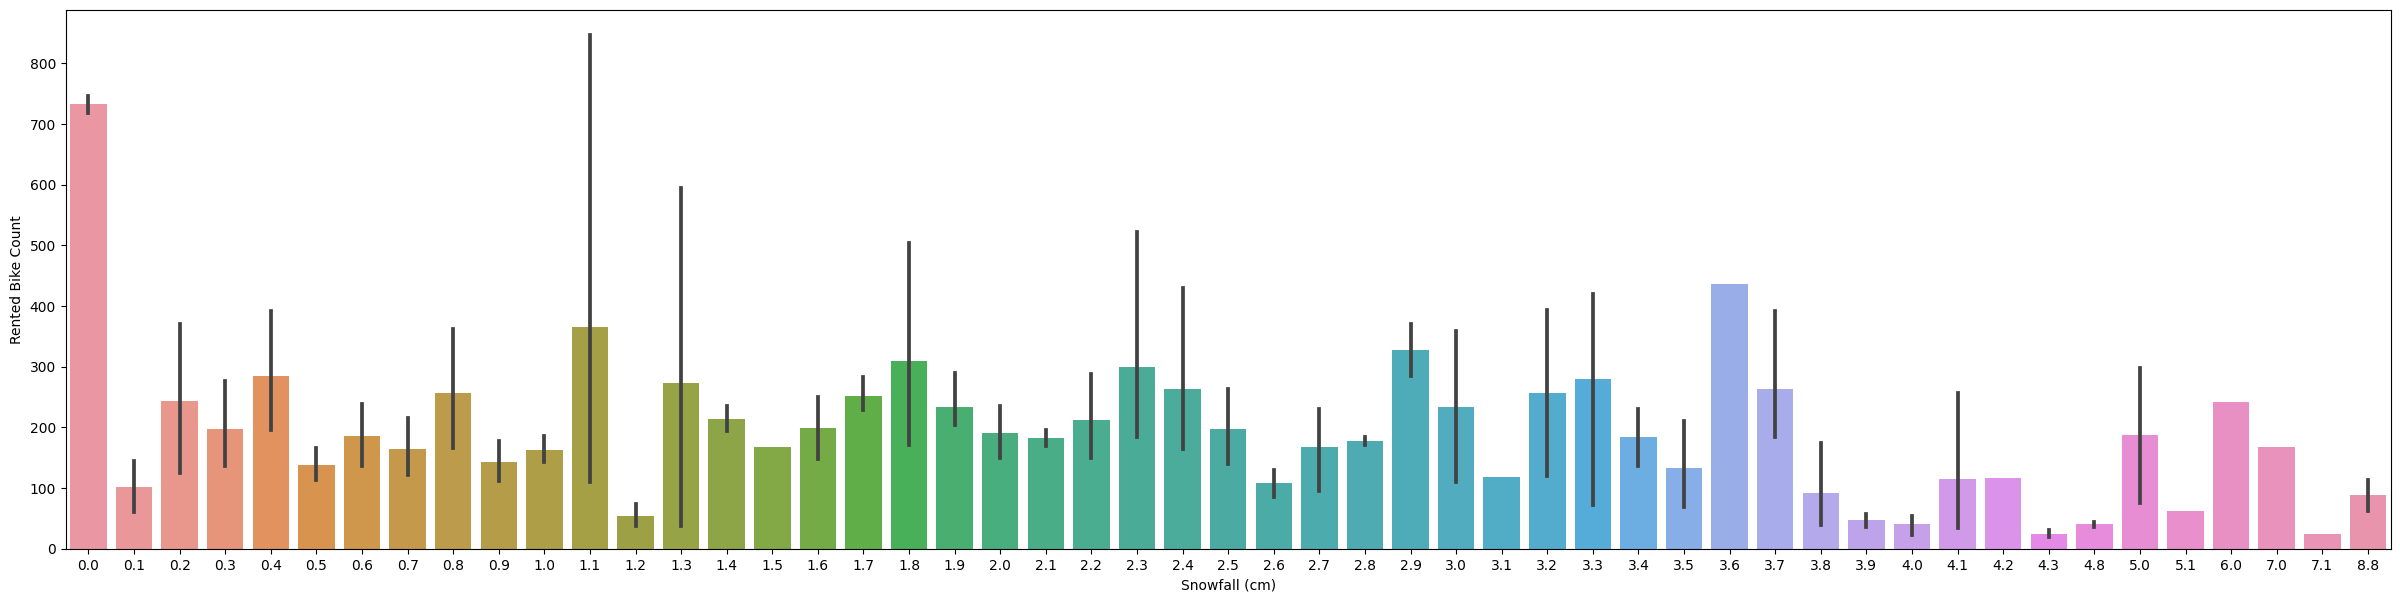

In [14]:
plt.figure(figsize=(30,7))
Month = df.groupby('Month').sum().reset_index()
sns.barplot(x=df['Snowfall (cm)'],y=df['Rented Bike Count'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int32

In [16]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Friday,12,2017


In [17]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [18]:
df.Seasons = df.Seasons.map({'Summer':0,'Spring':1,'Autumn':2,'Winter':3})
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,No Holiday,Yes,1,Friday,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,No Holiday,Yes,1,Friday,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,No Holiday,Yes,1,Friday,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,No Holiday,Yes,1,Friday,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,No Holiday,Yes,1,Friday,12,2017


In [19]:
df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [20]:
df.Holiday = df.Holiday.map({'No Holiday':0,'Holiday':1})
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,Yes,1,Friday,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,Yes,1,Friday,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,Yes,1,Friday,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,Yes,1,Friday,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,Yes,1,Friday,12,2017


In [21]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df['Functioning Day'] = df['Functioning Day'].map({'No':0,'Yes':1})
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,1,Friday,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,1,Friday,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,1,Friday,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,1,Friday,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,1,Friday,12,2017


In [23]:
df.weekday.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [24]:
df.weekday = df.weekday.replace(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'],[4,5,6,0,1,2,3])
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,weekday,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,0,1,1,4,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,0,1,1,4,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,0,1,1,4,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,0,1,1,4,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,0,1,1,4,12,2017


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   int64  
 11  Holiday                    8760 non-null   int64  
 12  Functioning Day            8760 non-null   int64  
 13  Day                        8760 non-null   int32

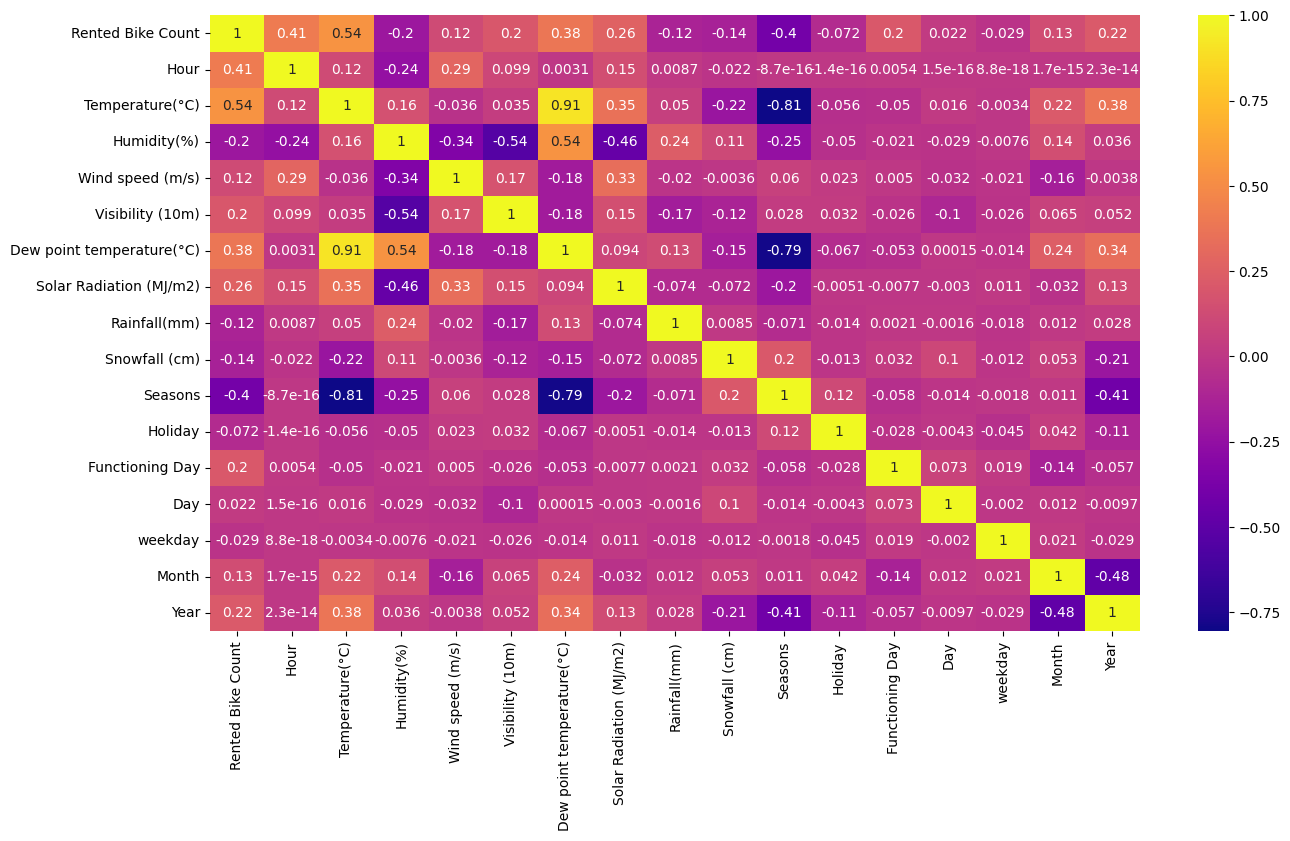

In [26]:
#check the correlation
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

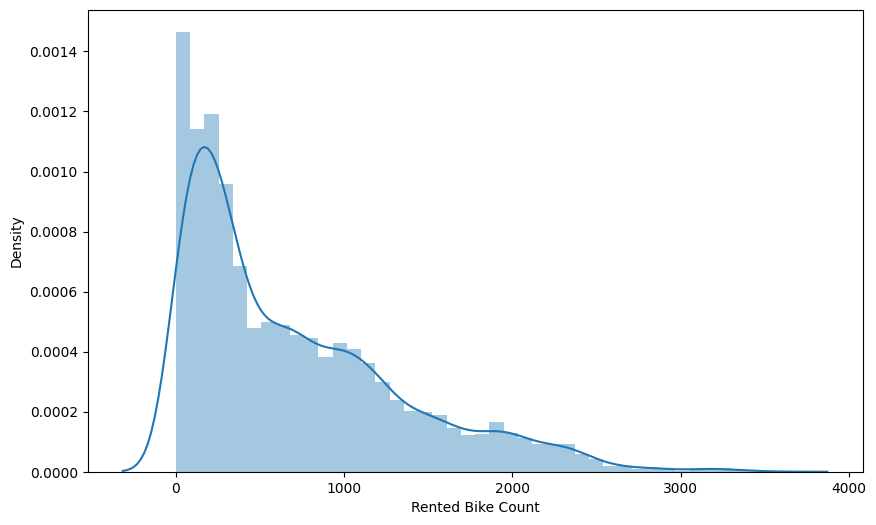

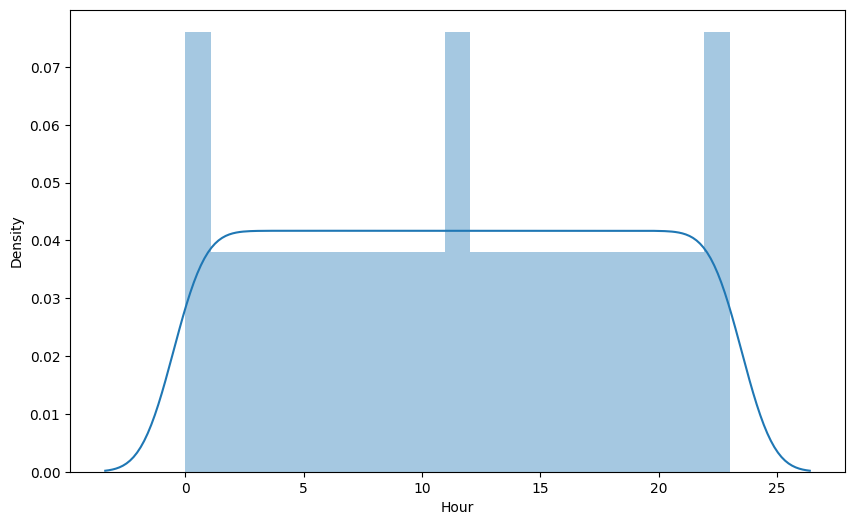

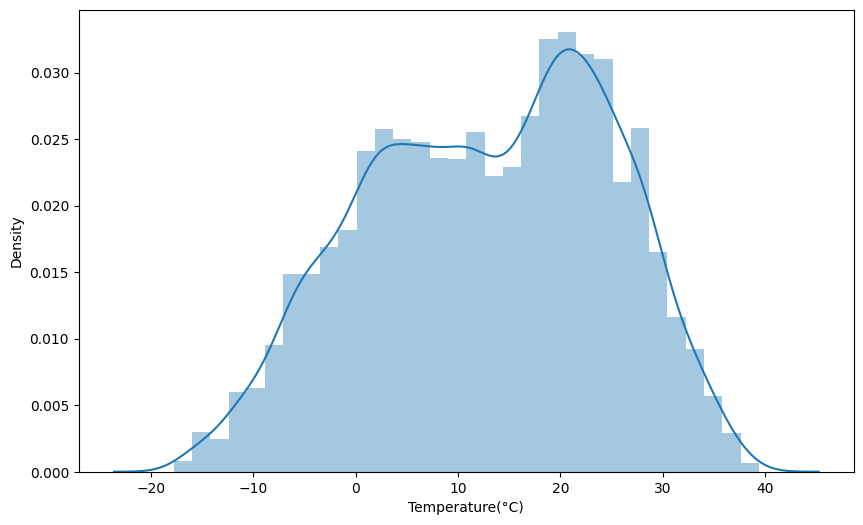

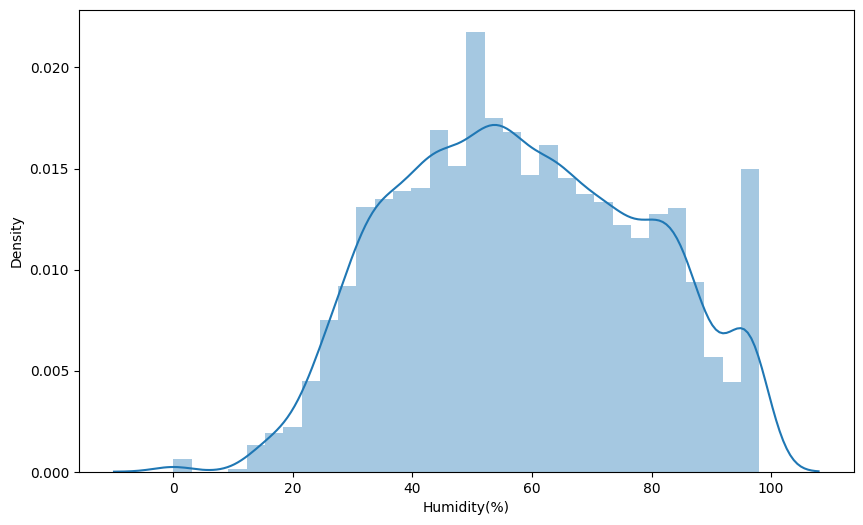

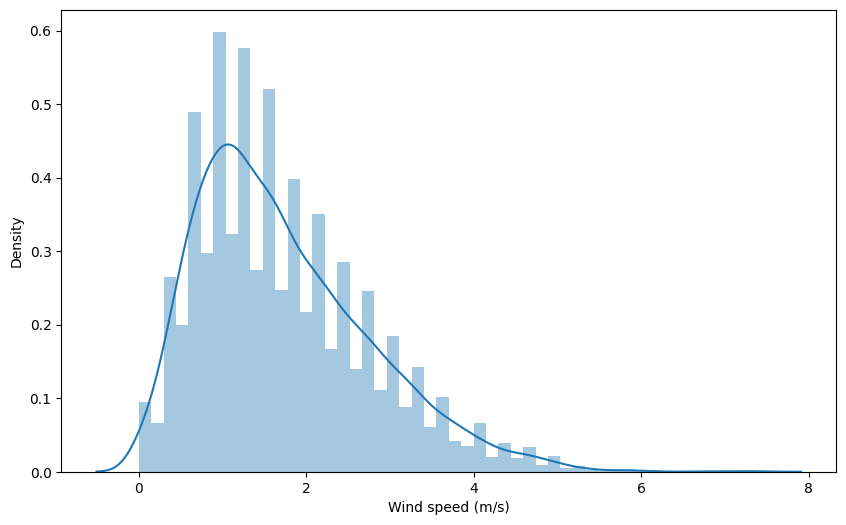

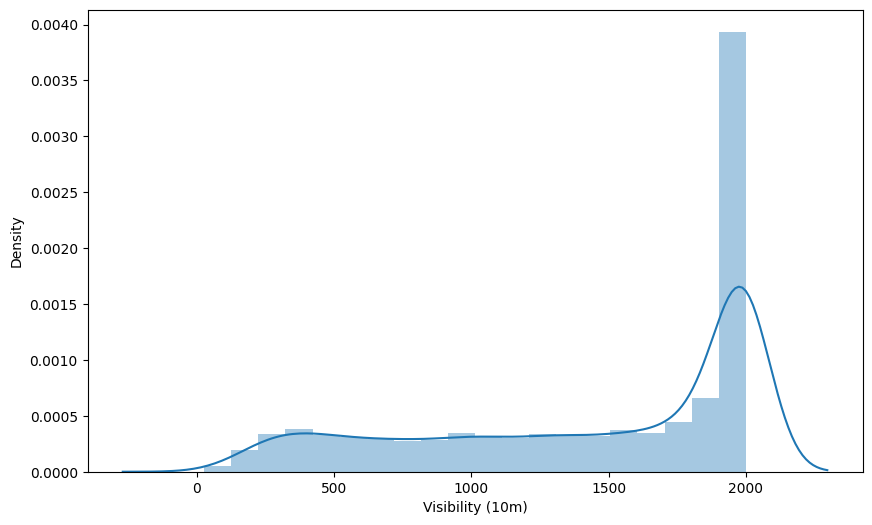

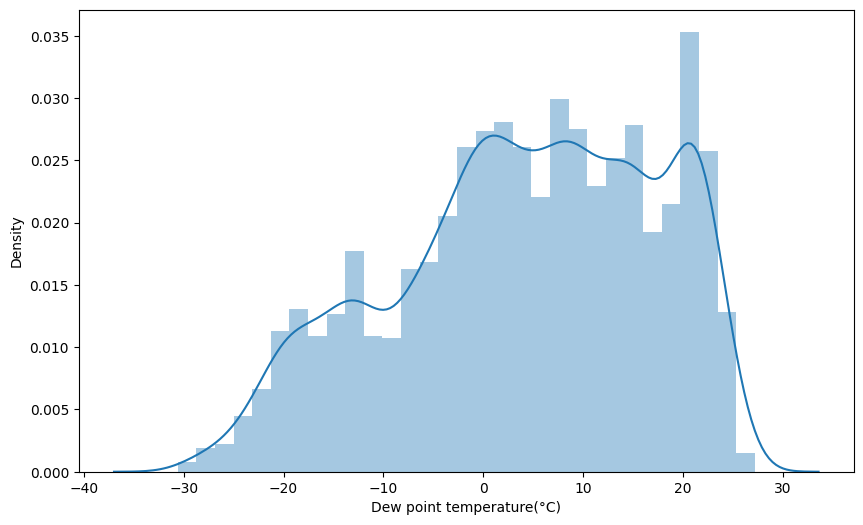

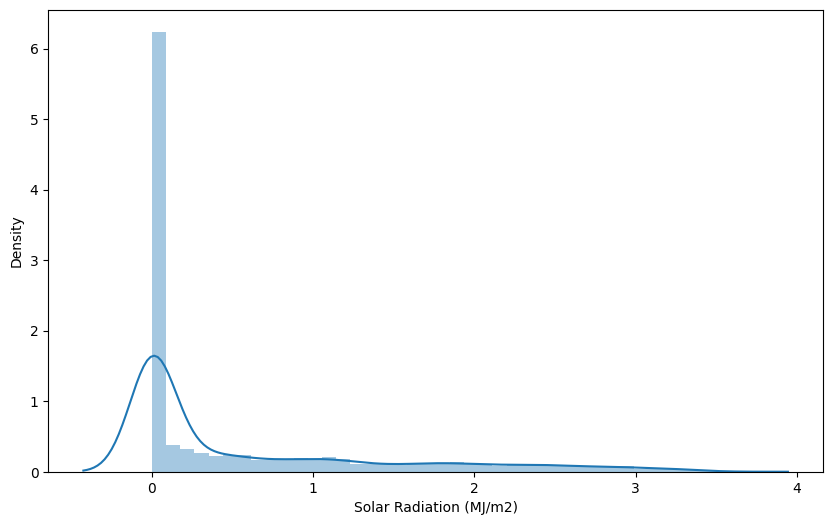

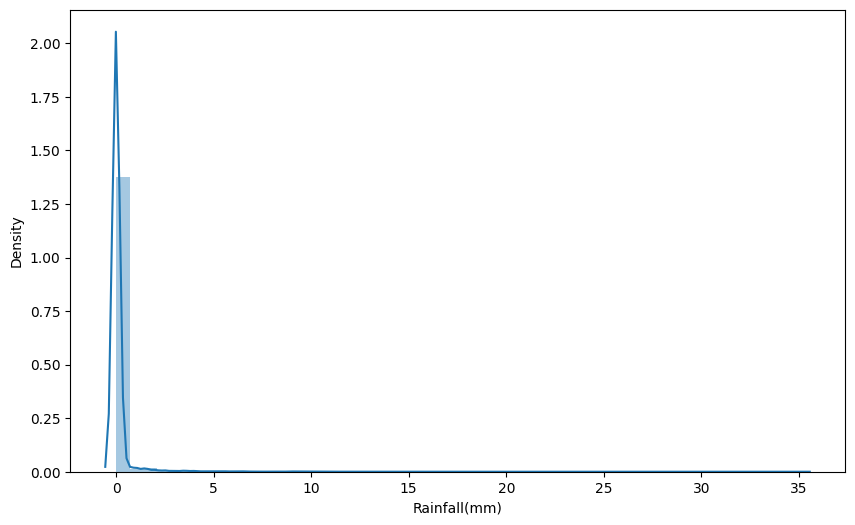

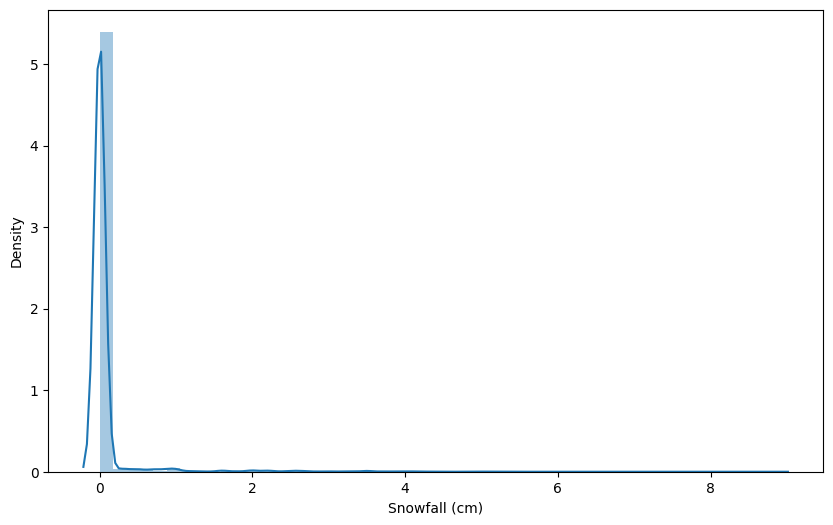

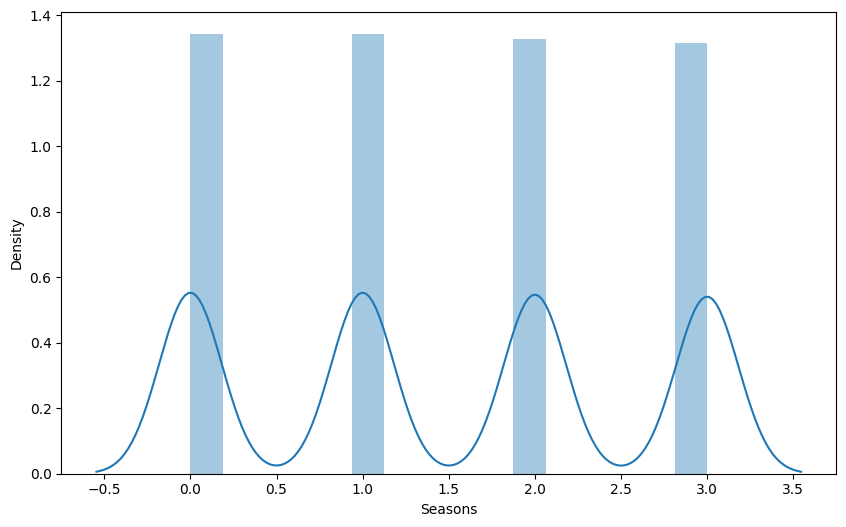

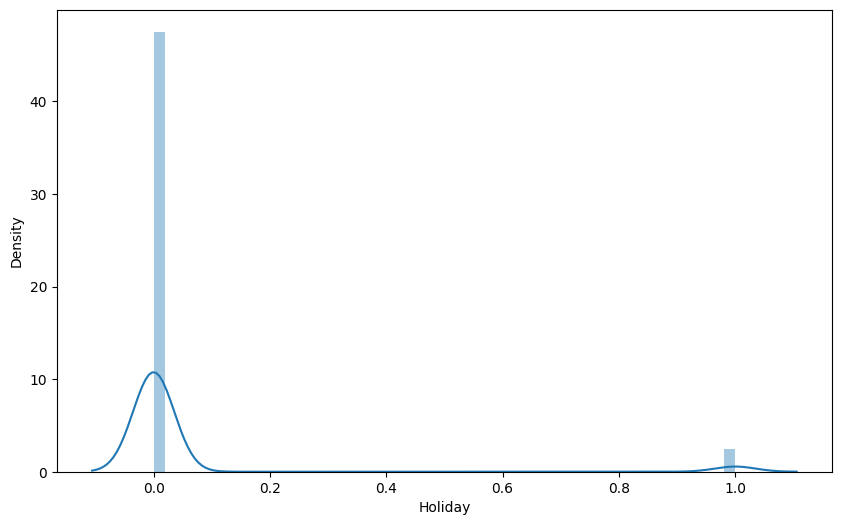

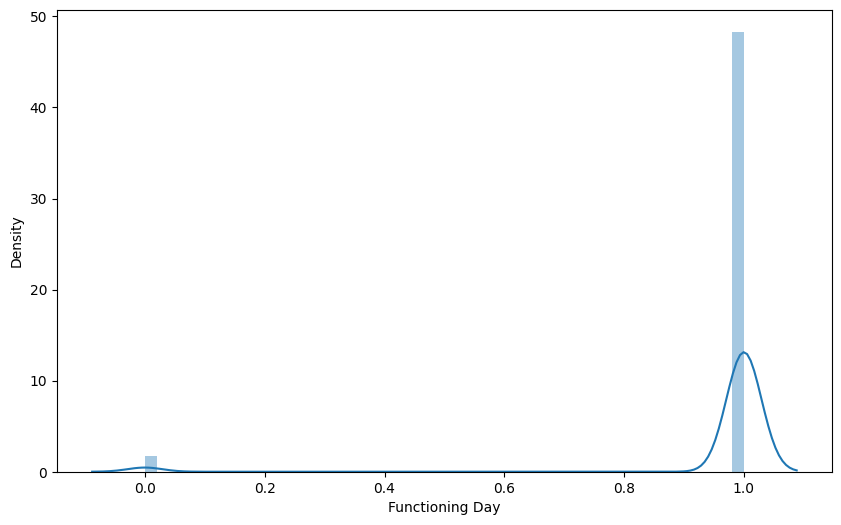

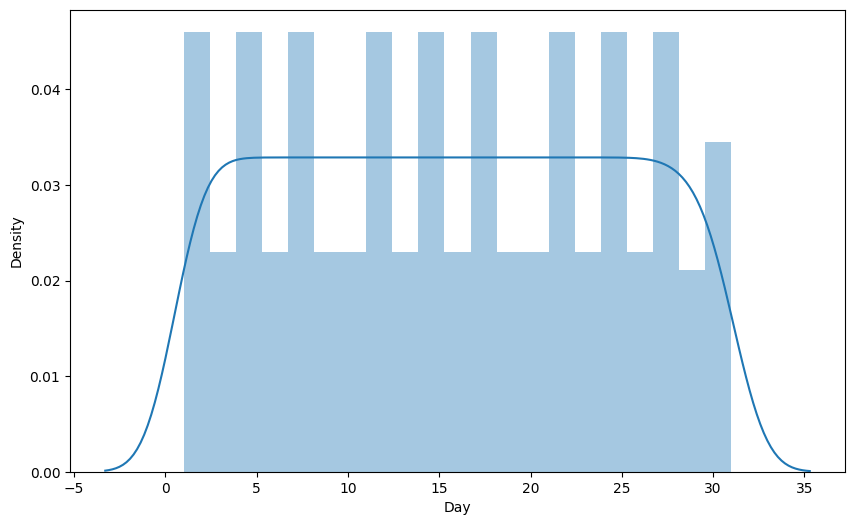

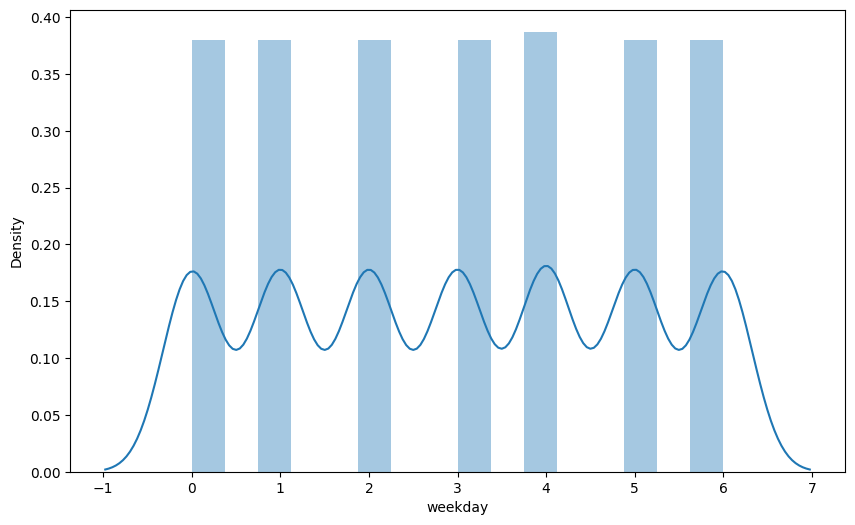

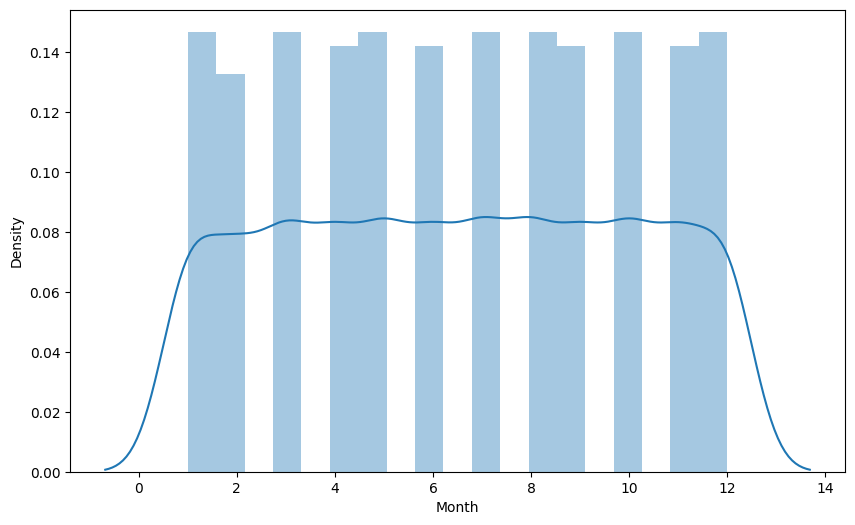

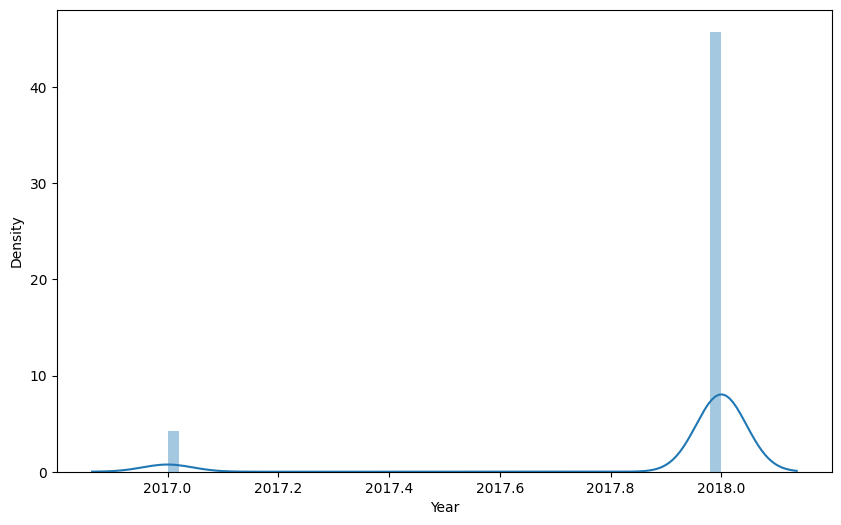

In [27]:

#check dist of all columns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()

In [28]:
df.columns


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'weekday', 'Month', 'Year'],
      dtype='object')

In [30]:
#SPliting the data
x = df.drop(['Rented Bike Count'],axis=1)
y = df['Rented Bike Count']


#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(7008, 16)
(7008,)
(1752, 16)
(1752,)


In [32]:
#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

x_train_scaled[:2]

array([[ 0.50542093,  0.02237011,  0.13701177,  2.09293986, -1.17611282,
         0.13055345,  0.5197009 , -0.13401915, -0.17102636,  0.45988477,
        -0.22996655,  0.18708879,  0.03124038,  0.49653743,  1.30209798,
         0.30179287],
       [-0.36356579,  0.83822207,  1.35998213, -0.02968279, -1.47266669,
         1.25546912,  0.21067702, -0.13401915, -0.17102636, -1.33708901,
        -0.22996655,  0.18708879,  1.50821158,  0.49653743, -0.15011137,
         0.30179287]])

In [33]:
#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [34]:
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)

Lasso()

In [35]:
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [36]:
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)

SVR()

In [ ]:
cat.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)

In [39]:
gpr.fit(x_train_scaled,y_train)

GaussianProcessRegressor()

In [40]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.5258508974922435
RIDGE  0.5258568326057914
LASSO  0.5255828598078052
ELASTICNET 0.4880061262062697
RANDOM FOREST  0.9262371618068611
GB 0.8489903436956525
ADABOOST 0.5732868081340288
XGB 0.9364350837766233
KNN 0.7716207609267304
SVR 0.33073367820667476
CAT 0.9467455158318665
LIGHTGBM 0.9425777928882515
GUASSIAN PROCESS 0.804822274957061


HERE THE BEST PERFORMING MODEL IS CATBOOST REGRESSOR


NOW Visualize the best performing model with testing data


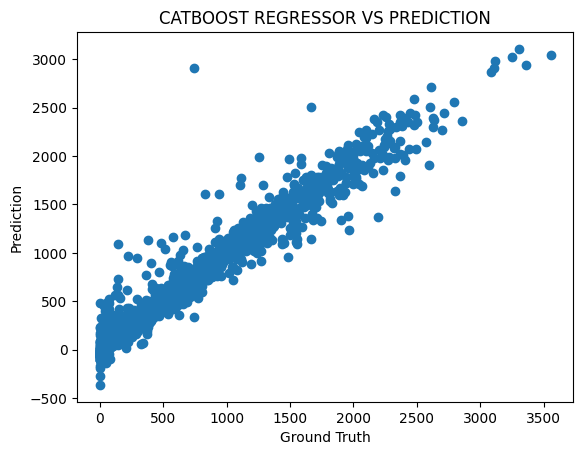

In [41]:
#NOW Visualize the best performing model with testing data

plt.scatter(y_test,catpred)
plt.title('CATBOOST REGRESSOR VS PREDICTION')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

In [42]:
#Now save the best model
import pickle
import joblib
pickle.dump(cat,open('catboost_v1.pkl','wb'))

In [44]:
#Now loading the model
model = pickle.load(open('catboost_v1.pkl','rb'))
model

In [45]:
#SCaled paramters
ss.mean_

array([1.15102740e+01, 1.29340325e+01, 5.81992009e+01, 1.73076484e+00,
       1.43683390e+03, 4.10557934e+00, 5.75927511e-01, 1.43007991e-01,
       7.72117580e-02, 1.48815639e+00, 5.02283105e-02, 9.66181507e-01,
       1.57250285e+01, 3.01027397e+00, 6.51683790e+00, 2.01791652e+03])

In [46]:
ss.scale_

array([6.90459343e+00, 1.18894119e+01, 2.04420327e+01, 1.03645365e+00,
       6.10344426e+02, 1.29787507e+01, 8.73718874e-01, 1.06707131e+00,
       4.51461149e-01, 1.11298230e+00, 2.18415721e-01, 1.80761729e-01,
       8.80179655e+00, 1.99325562e+00, 3.44302976e+00, 2.76600398e-01])

In [48]:
#NOW dump the scaling parameters
pickle.dump(ss,open('scaler parameters.pkl','wb'))


In [49]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'weekday', 'Month', 'Year'],
      dtype='object')

In [56]:
Hour=21
Temperature = 25
Humidity=55
Wind_speed=67
Visibility=25
Dew_point_temperature=-17.8
Solar_Radiation=0.0
Rainfall=0.8
Snowfall=0.2
Seasons=3
Holiday=0
Functioning_Day=1
Day=1
weekday=3
Month=12
Year=2017

In [59]:
u_input_list = [Hour,
Temperature,
Humidity,
Wind_speed,
Visibility,
Dew_point_temperature,
Solar_Radiation,
Rainfall,
Snowfall,
Seasons,
Holiday,
Functioning_Day,
Day,
weekday,Month,Year]

feature_names = ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'weekday', 'Month', 'Year']

In [60]:
u_input_list

[21, 25, 55, 67, 25, -17.8, 0.0, 0.8, 0.2, 3, 0, 1, 1, 3, 12, 2017]

In [61]:
feature_names

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Day',
 'weekday',
 'Month',
 'Year']

In [70]:
model.predict(u_input_list)
print(f'Rented Bike Demand is --> {round(model.predict(u_input_list).tolist())}')

Rented Bike Demand is --> 376
